# Unsupervised Learning

Author: Andrew Farell

**Introduction and Motivation**

I am undertaking an exploratory analysis of a dataset containing geometrical measurements of wheat kernels. In this dataset, each observation represents a single kernel, described by seven features derived from its shape. Specifically, these features include:

1. **Area** – the area of the kernel,  
2. **Perimeter** – the total outer boundary length,  
3. **Compactness** – $ C = \frac{4 \pi \times \text{Area}}{\text{Perimeter}^2} $,  
4. **KernelLength** – the major axis length of the kernel,  
5. **KernelWidth** – the minor axis length of the kernel,  
6. **AsymmetryCoeff** – a measure of asymmetry in the kernel shape,  
7. **KernelGroove** – the length of the central groove running longitudinally along the kernel.

Although the dataset is accompanied by labels indicating different varieties of wheat, I intend to apply an unsupervised learning approach, which means I will temporarily disregard those labels. My goal is to use clustering to discover natural groupings within the data, relying solely on the measured properties rather than on any external categorization. By comparing these groupings to the known wheat varieties (once clusters have been established), I hope to gauge how effectively the inherent geometry of the kernels discriminates between different wheat types—or whether new and potentially insightful cluster structures emerge.

**Mathematical Objective**

At the heart of my investigation is the task of clustering—a process in which I partition the data into subgroups (clusters) of observations that are more similar to one another, in terms of their geometric attributes, than to observations in other clusters. The mathematical objective can be framed as minimizing a criterion such as the overall within-cluster variance. In the case of k-means clustering, for instance, I would select a number of clusters $k$, initialize cluster centers, and iteratively reassign each kernel to the nearest center based on a distance metric (often Euclidean distance), then update cluster centers until convergence. Other clustering methods, like hierarchical clustering, build nested groupings by progressively merging or splitting observations according to their distances. 

By analyzing cluster outputs, I will see whether these naturally formed clusters correspond to distinct wheat varieties or potentially reveal more nuanced structures in the data. This unsupervised learning process, coupled with visual exploration and statistical summaries of each cluster, can provide further insight into the key features that drive cluster formation.


=== Starting Exploratory Data Analysis ===

Loading the seeds dataset from: seeds_dataset.txt
             Area   Perimeter  Compactness  KernelLength  KernelWidth  \
count  210.000000  210.000000   210.000000    210.000000   210.000000   
mean    14.847524   14.559286     0.870999      5.628533     3.258605   
std      2.909699    1.305959     0.023629      0.443063     0.377714   
min     10.590000   12.410000     0.808100      4.899000     2.630000   
25%     12.270000   13.450000     0.856900      5.262250     2.944000   
50%     14.355000   14.320000     0.873450      5.523500     3.237000   
75%     17.305000   15.715000     0.887775      5.979750     3.561750   
max     21.180000   17.250000     0.918300      6.675000     4.033000   

       AsymmetryCoeff  KernelGroove       Class  
count      210.000000    210.000000  210.000000  
mean         3.700201      5.408071    2.000000  
std          1.503557      0.491480    0.818448  
min          0.765100      4.519000    1.000000

/var/folders/zs/shhcdcsn26qbnlfxpxbnd8p40000gn/T/ipykernel_65166/1323101824.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_eda = pd.read_csv(data_file_path, delim_whitespace=True, names=col_names)


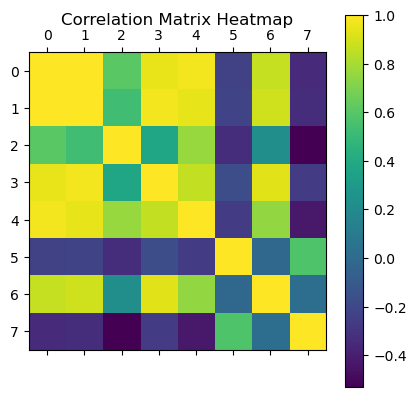


Generating and Saving Histograms for Each Numeric Feature...
Creating Histogram for: Area


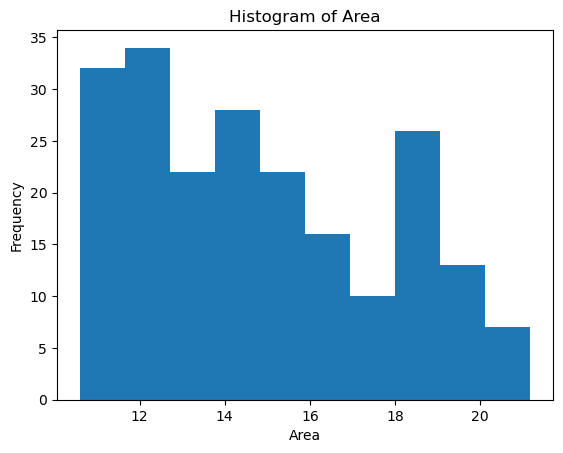

Creating Histogram for: Perimeter


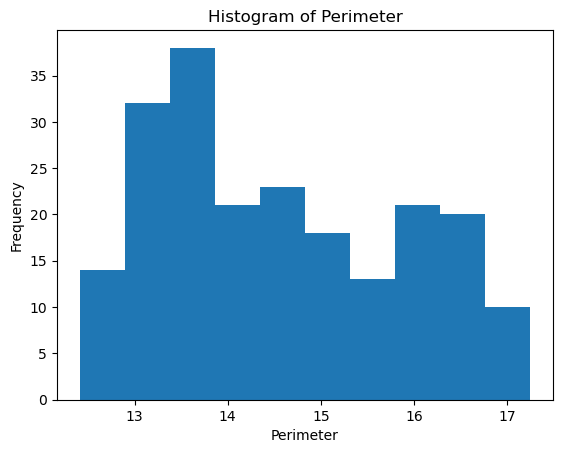

Creating Histogram for: Compactness


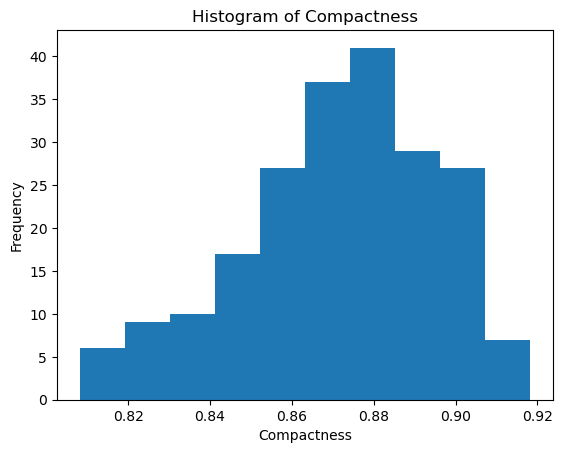

Creating Histogram for: KernelLength


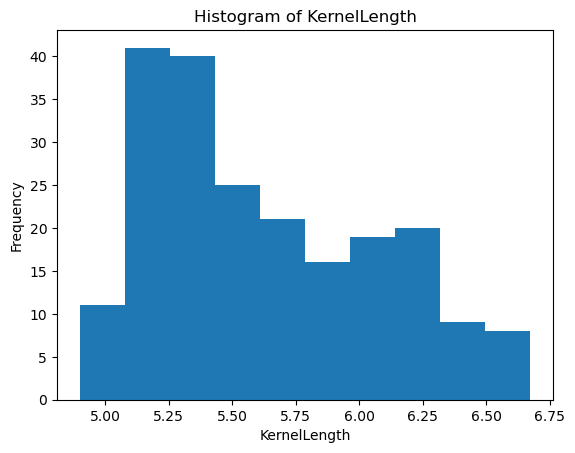

Creating Histogram for: KernelWidth


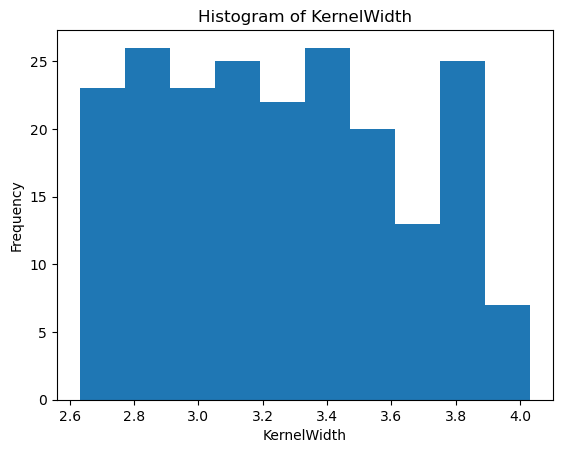

Creating Histogram for: AsymmetryCoeff


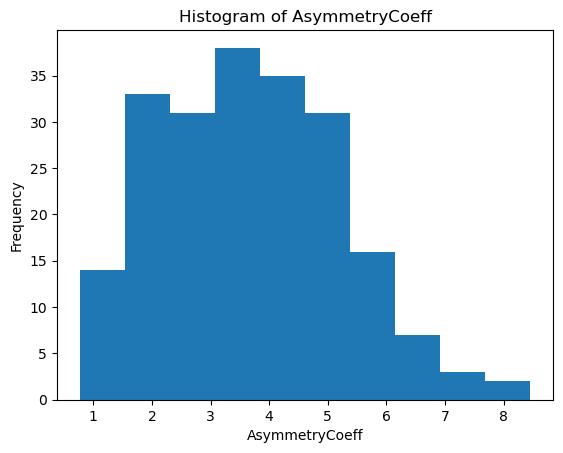

Creating Histogram for: KernelGroove


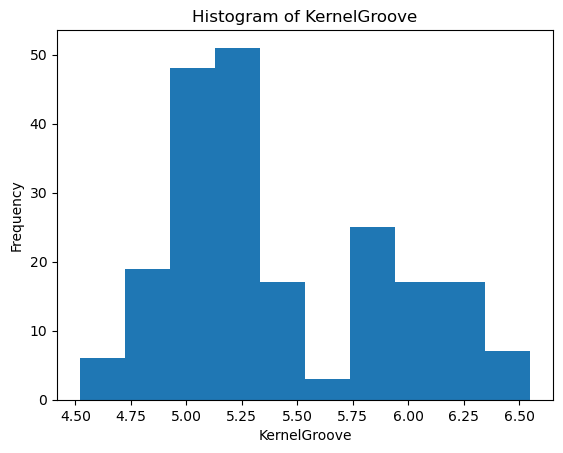


Generating and Saving Boxplots for Each Numeric Feature...
Creating Boxplot for: Area


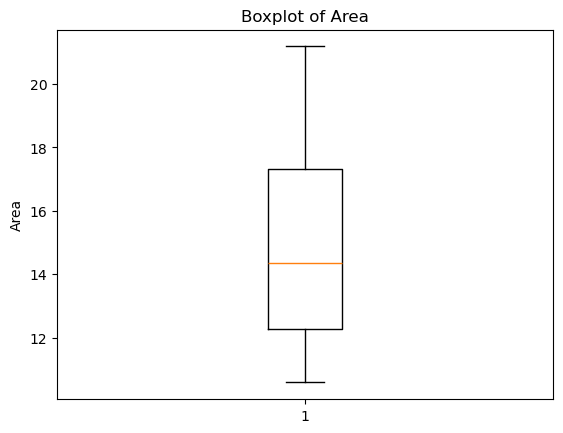

Creating Boxplot for: Perimeter


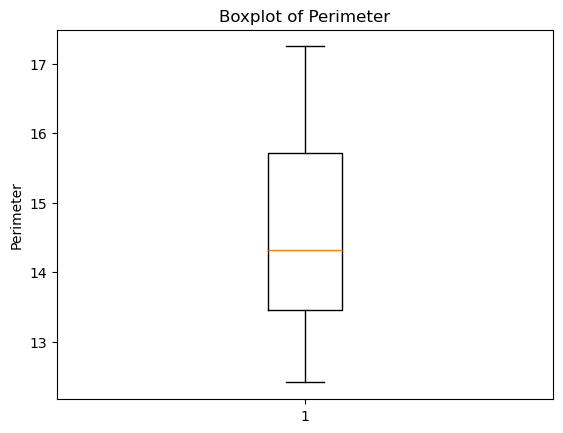

Creating Boxplot for: Compactness


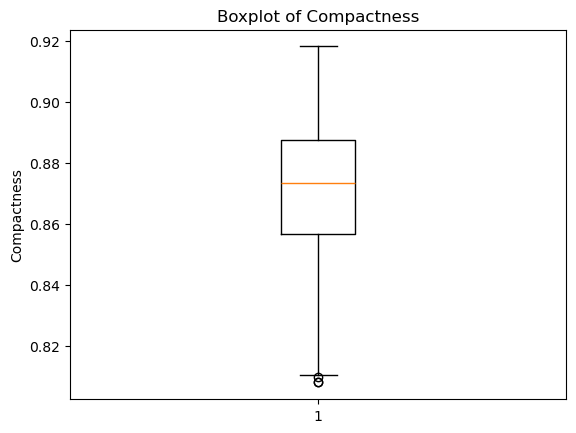

Creating Boxplot for: KernelLength


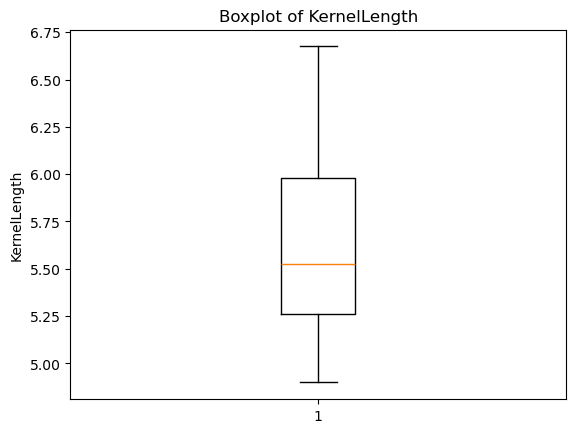

Creating Boxplot for: KernelWidth


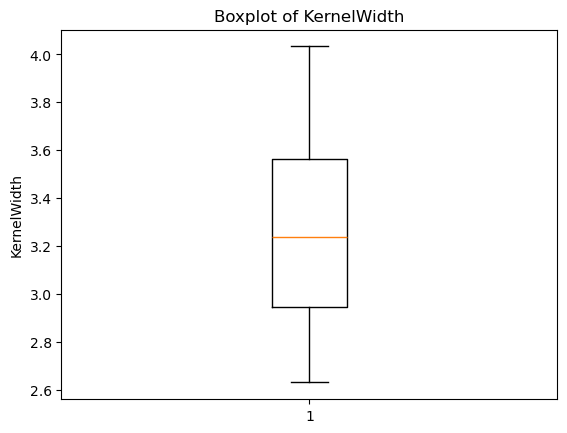

Creating Boxplot for: AsymmetryCoeff


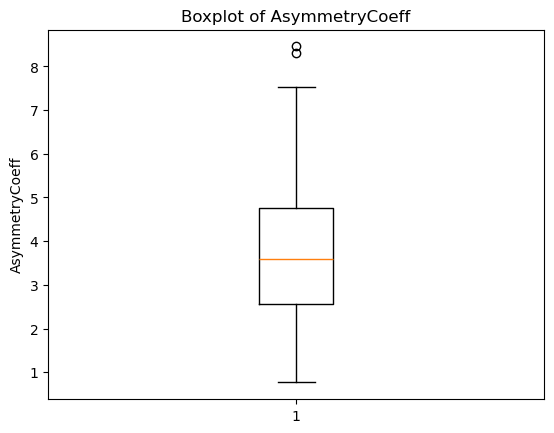

Creating Boxplot for: KernelGroove


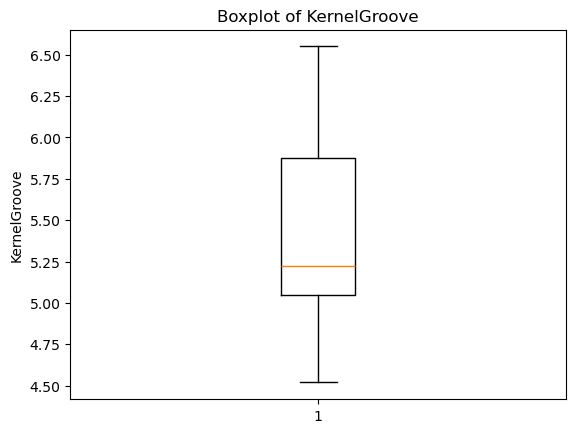


Generating and Saving a Sample Scatter Plot (KernelLength vs. KernelWidth)...


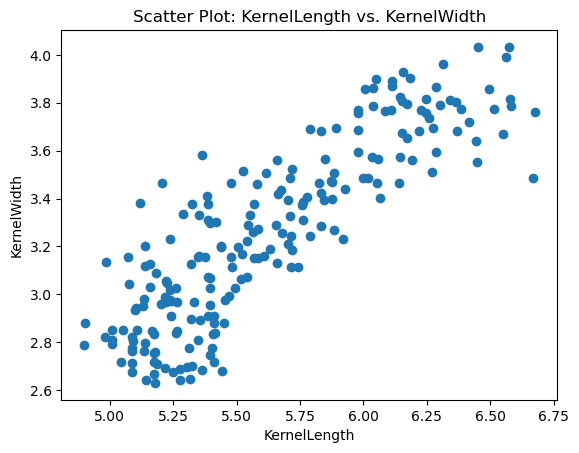


=== EDA Completed Successfully ===



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os


if not os.path.exists("outputs"):
    os.makedirs("outputs")
data_file_path = "seeds_dataset.txt"

print("\n=== Starting Exploratory Data Analysis ===\n")
print("Loading the seeds dataset from:", data_file_path)

col_names = [
    "Area",
    "Perimeter",
    "Compactness",
    "KernelLength",
    "KernelWidth",
    "AsymmetryCoeff",
    "KernelGroove",
    "Class"
]
df_eda = pd.read_csv(data_file_path, delim_whitespace=True, names=col_names)

print(df_eda.describe())

print("\n--- 1) Basic Information ---")
print("DataFrame Shape: (rows, columns)")
print(df_eda.shape, "\n")

print("First Five Rows of the Dataset:")
print(df_eda.head().to_string(index=False), "\n")

print("--- 2) Descriptive Statistics ---")
print(df_eda.describe().to_string(), "\n")

print("--- 3) Missing Values per Column ---")
print(df_eda.isnull().sum().to_string(), "\n")

print("--- 4) Correlation Matrix (Numerical Columns) ---")
correlation_matrix = df_eda.corr()
print(correlation_matrix.to_string(), "\n")

print("Generating and Saving Correlation Matrix Heatmap...")
plt.matshow(correlation_matrix, cmap='viridis')
plt.title("Correlation Matrix Heatmap", pad=20)
plt.colorbar()
plt.savefig("outputs/correlation_matrix_heatmap.png")
plt.show()

print("\nGenerating and Saving Histograms for Each Numeric Feature...")
numeric_cols_eda = df_eda.columns[:-1]
for col in numeric_cols_eda:
    print(f"Creating Histogram for: {col}")
    plt.hist(df_eda[col], bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f"outputs/histogram_{col}.png")
    plt.show()

print("\nGenerating and Saving Boxplots for Each Numeric Feature...")
for col in numeric_cols_eda:
    print(f"Creating Boxplot for: {col}")
    plt.boxplot(df_eda[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.savefig(f"outputs/boxplot_{col}.png")
    plt.show()

print("\nGenerating and Saving a Sample Scatter Plot (KernelLength vs. KernelWidth)...")
plt.scatter(df_eda["KernelLength"], df_eda["KernelWidth"])
plt.title("Scatter Plot: KernelLength vs. KernelWidth")
plt.xlabel("KernelLength")
plt.ylabel("KernelWidth")
plt.savefig("outputs/scatter_kernellength_vs_kernelwidth.png")
plt.show()

print("\n=== EDA Completed Successfully ===\n")


The dataset contains 210 wheat kernels, each described by seven geometric attributes—Area, Perimeter, Compactness, KernelLength, KernelWidth, AsymmetryCoeff, and KernelGroove—plus a Class label (1, 2, or 3). Across these features, there are no missing values, indicating a clean dataset. Area spans from 10.59 to 21.18 with a mean of 14.85, while Perimeter ranges from 12.41 to 17.25 (mean 14.56). Compactness lies between 0.8081 and 0.9183, and KernelLength and KernelWidth exhibit medians of 5.52 and 3.24, respectively, reinforcing that kernels tend to be longer than they are wide. AsymmetryCoeff varies substantially, from roughly 0.77 to 8.46, and KernelGroove has a mean of about 5.41, spanning 4.52 to 6.55.

Regarding correlations, Area, Perimeter, KernelLength, and KernelWidth are highly interrelated, indicating that kernels exhibiting large area also tend to have a large perimeter and extended lengths and widths. Meanwhile, AsymmetryCoeff shows a moderate negative correlation with KernelWidth and a positive correlation with the class label, hinting that varieties may differ partly based on asymmetry. Overall, the dataset offers a robust set of geometric measurements well suited for unsupervised exploration or classification tasks.


=== Starting K-Means Clustering ===

Loading the seeds dataset from: seeds_dataset.txt

--- Basic Dataset Information for Clustering ---
DataFrame Shape: (rows, columns)
(210, 8) 

First Five Rows (for verification):
 Area  Perimeter  Compactness  KernelLength  KernelWidth  AsymmetryCoeff  KernelGroove  Class
15.26      14.84       0.8710         5.763        3.312           2.221         5.220      1
14.88      14.57       0.8811         5.554        3.333           1.018         4.956      1
14.29      14.09       0.9050         5.291        3.337           2.699         4.825      1
13.84      13.94       0.8955         5.324        3.379           2.259         4.805      1
16.14      14.99       0.9034         5.658        3.562           1.355         5.175      1 

--- Running K-Means for k in [2..10] ---
Fitting K-Means with k=2...
Fitting K-Means with k=3...
Fitting K-Means with k=4...
Fitting K-Means with k=5...
Fitting K-Means with k=6...
Fitting K-Means with k=7...
Fitting

/var/folders/zs/shhcdcsn26qbnlfxpxbnd8p40000gn/T/ipykernel_65166/1570242126.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_clust = pd.read_csv(data_file_path, delim_whitespace=True, names=col_names)


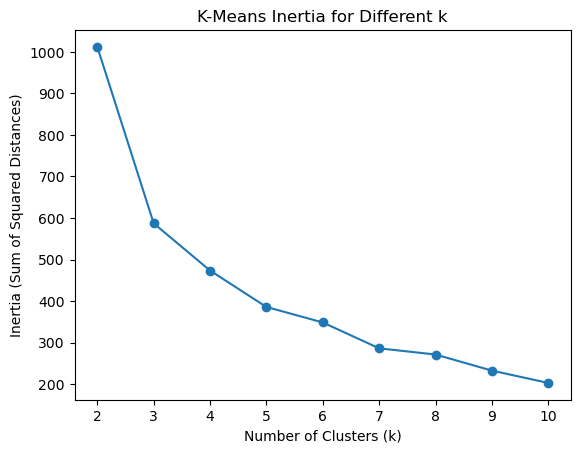


--- Creating Color Plots for Different k ---
Generating color-coded scatter plot for k=2


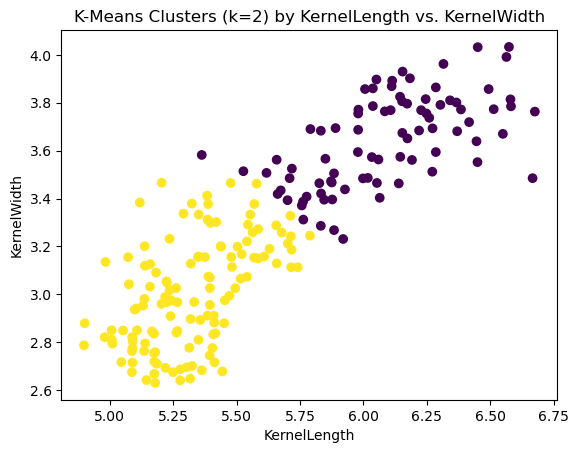

Generating color-coded scatter plot for k=3


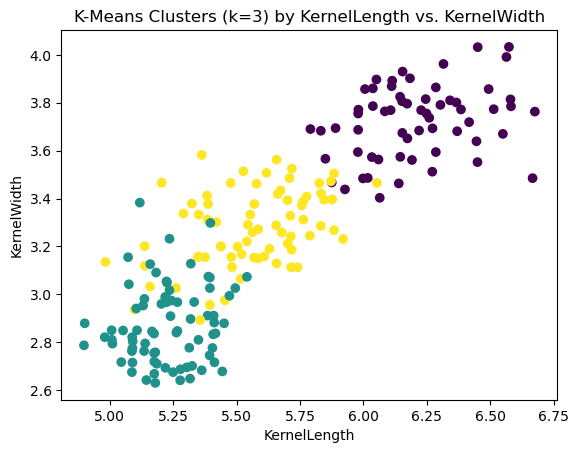

Generating color-coded scatter plot for k=4


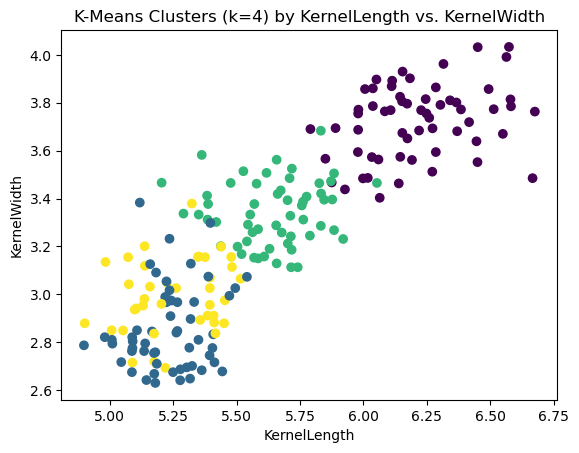

Generating color-coded scatter plot for k=5


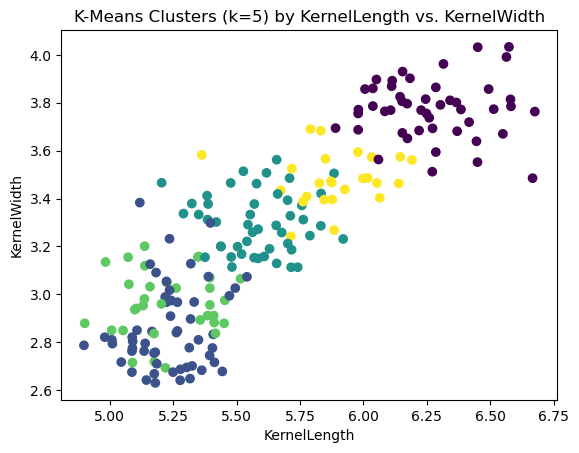

Generating color-coded scatter plot for k=6


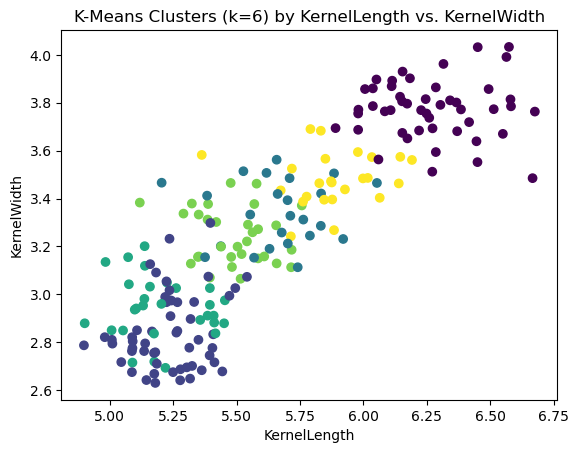

Generating color-coded scatter plot for k=7


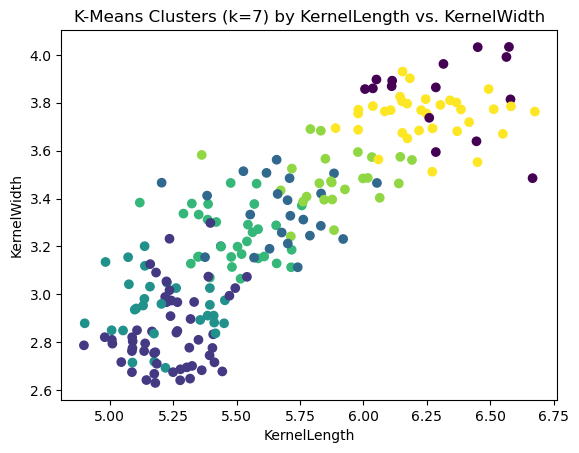

Generating color-coded scatter plot for k=8


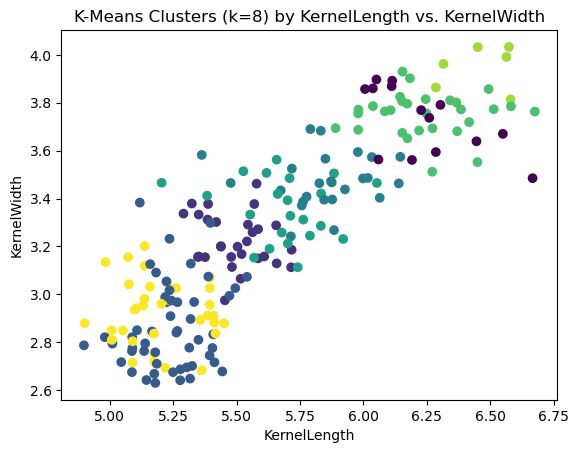

Generating color-coded scatter plot for k=9


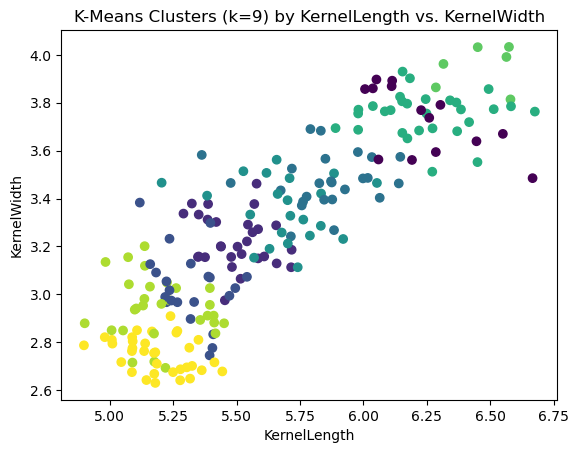

Generating color-coded scatter plot for k=10


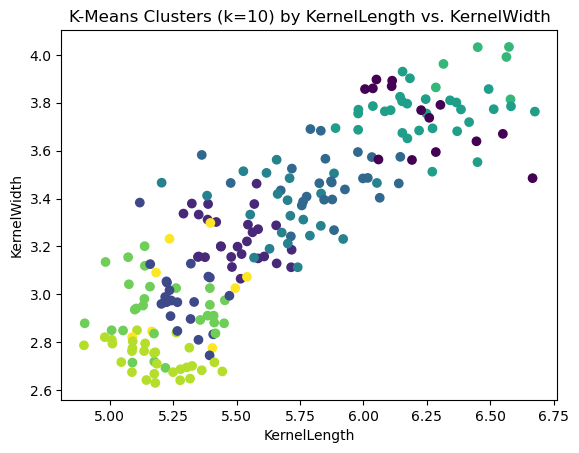


--- Finalizing Clustering with k=3 ---
Cluster assignments saved to 'outputs/seeds_with_clusters.csv'.

=== Cluster Assignment Counts (k=3) ===
Cluster
1    77
2    72
0    61 

Generating and Saving Final Scatter Plot with Cluster Labels...


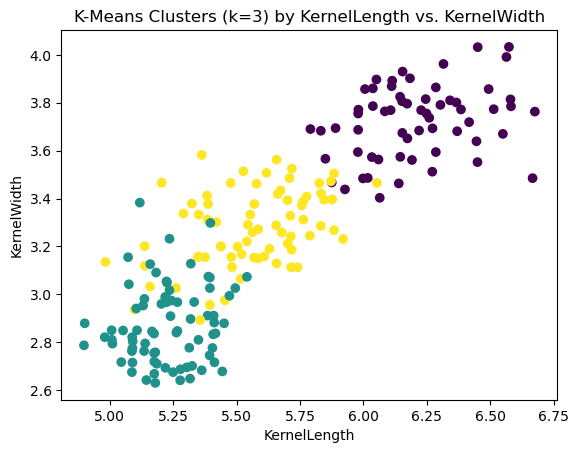


=== K-Means Clustering Completed Successfully ===



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Ensure the outputs/ directory exists
if not os.path.exists("outputs"):
    os.makedirs("outputs")

data_file_path = "seeds_dataset.txt"
col_names = [
    "Area",
    "Perimeter",
    "Compactness",
    "KernelLength",
    "KernelWidth",
    "AsymmetryCoeff",
    "KernelGroove",
    "Class"
]
df_clust = pd.read_csv(data_file_path, delim_whitespace=True, names=col_names)

print("\n=== Starting K-Means Clustering ===\n")
print("Loading the seeds dataset from:", data_file_path)

print("\n--- Basic Dataset Information for Clustering ---")
print("DataFrame Shape: (rows, columns)")
print(df_clust.shape, "\n")

print("First Five Rows (for verification):")
print(df_clust.head().to_string(index=False), "\n")

numeric_cols = df_clust.columns[:-1]
X = df_clust[numeric_cols].values

print("--- Running K-Means for k in [2..10] ---")
inertias = []
K_values = range(2, 11)
for k in K_values:
    print(f"Fitting K-Means with k={k}...")
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

print("\nInertia Values by k:")
for k_val, inertia_val in zip(K_values, inertias):
    print(f"k={k_val}, inertia={inertia_val}")

print("\nGenerating and Saving Inertia Plot...")
plt.plot(K_values, inertias, marker='o')
plt.title("K-Means Inertia for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.savefig("outputs/kmeans_inertia_plot.png")
plt.show()

print("\n--- Creating Color Plots for Different k ---")
for k in K_values:
    print(f"Generating color-coded scatter plot for k={k}")
    km_temp = KMeans(n_clusters=k, random_state=42)
    cluster_labels_temp = km_temp.fit_predict(X)
    plt.scatter(df_clust["KernelLength"], df_clust["KernelWidth"], c=cluster_labels_temp)
    plt.title(f"K-Means Clusters (k={k}) by KernelLength vs. KernelWidth")
    plt.xlabel("KernelLength")
    plt.ylabel("KernelWidth")
    plt.savefig(f"outputs/kmeans_scatter_clusters_k_{k}.png")
    plt.show()

best_k = 3
print(f"\n--- Finalizing Clustering with k={best_k} ---")
km_final = KMeans(n_clusters=best_k, random_state=42)
clusters = km_final.fit_predict(X)
df_clust["Cluster"] = clusters
df_clust.to_csv("outputs/seeds_with_clusters.csv", index=False)
print("Cluster assignments saved to 'outputs/seeds_with_clusters.csv'.")

print("\n=== Cluster Assignment Counts (k=3) ===")
print(df_clust["Cluster"].value_counts().to_string(), "\n")

print("Generating and Saving Final Scatter Plot with Cluster Labels...")
plt.scatter(df_clust["KernelLength"], df_clust["KernelWidth"], c=df_clust["Cluster"])
plt.title(f"K-Means Clusters (k={best_k}) by KernelLength vs. KernelWidth")
plt.xlabel("KernelLength")
plt.ylabel("KernelWidth")
plt.savefig("outputs/kmeans_scatter_clusters.png")
plt.show()

print("\n=== K-Means Clustering Completed Successfully ===\n")


The clustering analysis was performed on the seeds dataset using K-Means for a range of $k$ values from 2 to 10. **The total within-cluster sum of squares, known as “inertia,” decreases steadily as $k$ increases**, reflecting the finer segmentation into more clusters. When $k=2$, the inertia is approximately 1011.7, and it drops sharply to about 587.3 at $k=3$, **indicating a major improvement in partitioning the kernels**. Increasing $k$ beyond 3 continues to reduce the inertia—falling to around 203.4 by $k=10$—though **the rate of improvement lessens with each additional cluster**. 

These observations align with the typical “elbow” pattern, where an optimal $k$ can be selected by balancing the desire for low inertia against the diminishing returns and added complexity of introducing more clusters. In this case, $k=3$ emerges as a sensible choice because it yields a substantial jump in clustering quality from $k=2$ while avoiding too many narrowly defined groups. Nonetheless, depending on specific research objectives—such as identifying subtle varietal distinctions or exploring subgroups within a given strain—researchers may justify selecting other $k$ values to meet more specialized requirements.